Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\14_Decision_tree\Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


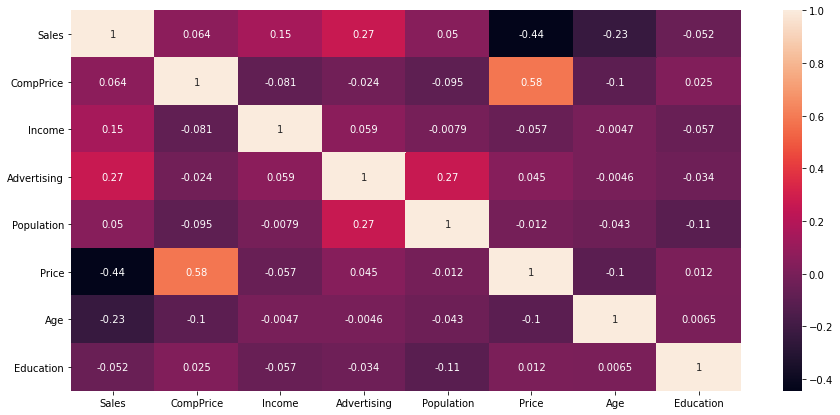

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

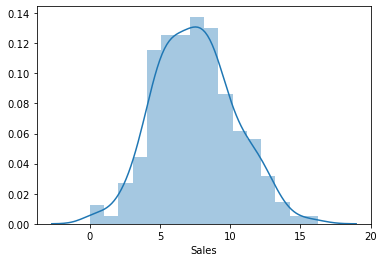

In [43]:
sns.distplot(df.Sales)
plt.show()

In [55]:
#grouping sales units 


bins = [0,6,12,18]
labels= [0,1,2]
df['Sales_Group'] = pd.cut(df['Sales'],bins=bins, labels=labels,right=False)

In [56]:
# label encoding

def label_encoding(data):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in data.select_dtypes(include=object).columns:
        data[i]= label_encoder.fit_transform(data.select_dtypes(include=object)[i]) 
        
    return data.head()

In [57]:
label_encoding(df)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Group
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [11]:
## building model

#importin libraries
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [60]:
# Splitting data into training and testing data set
x=df.iloc[:,1:-1]
y=df.iloc[:,-1:]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)


In [61]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

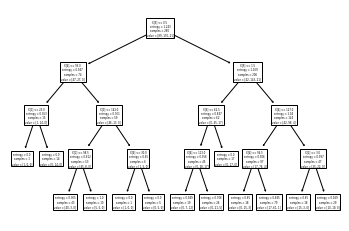

In [62]:
#PLot the decision tree
tree.plot_tree(model);

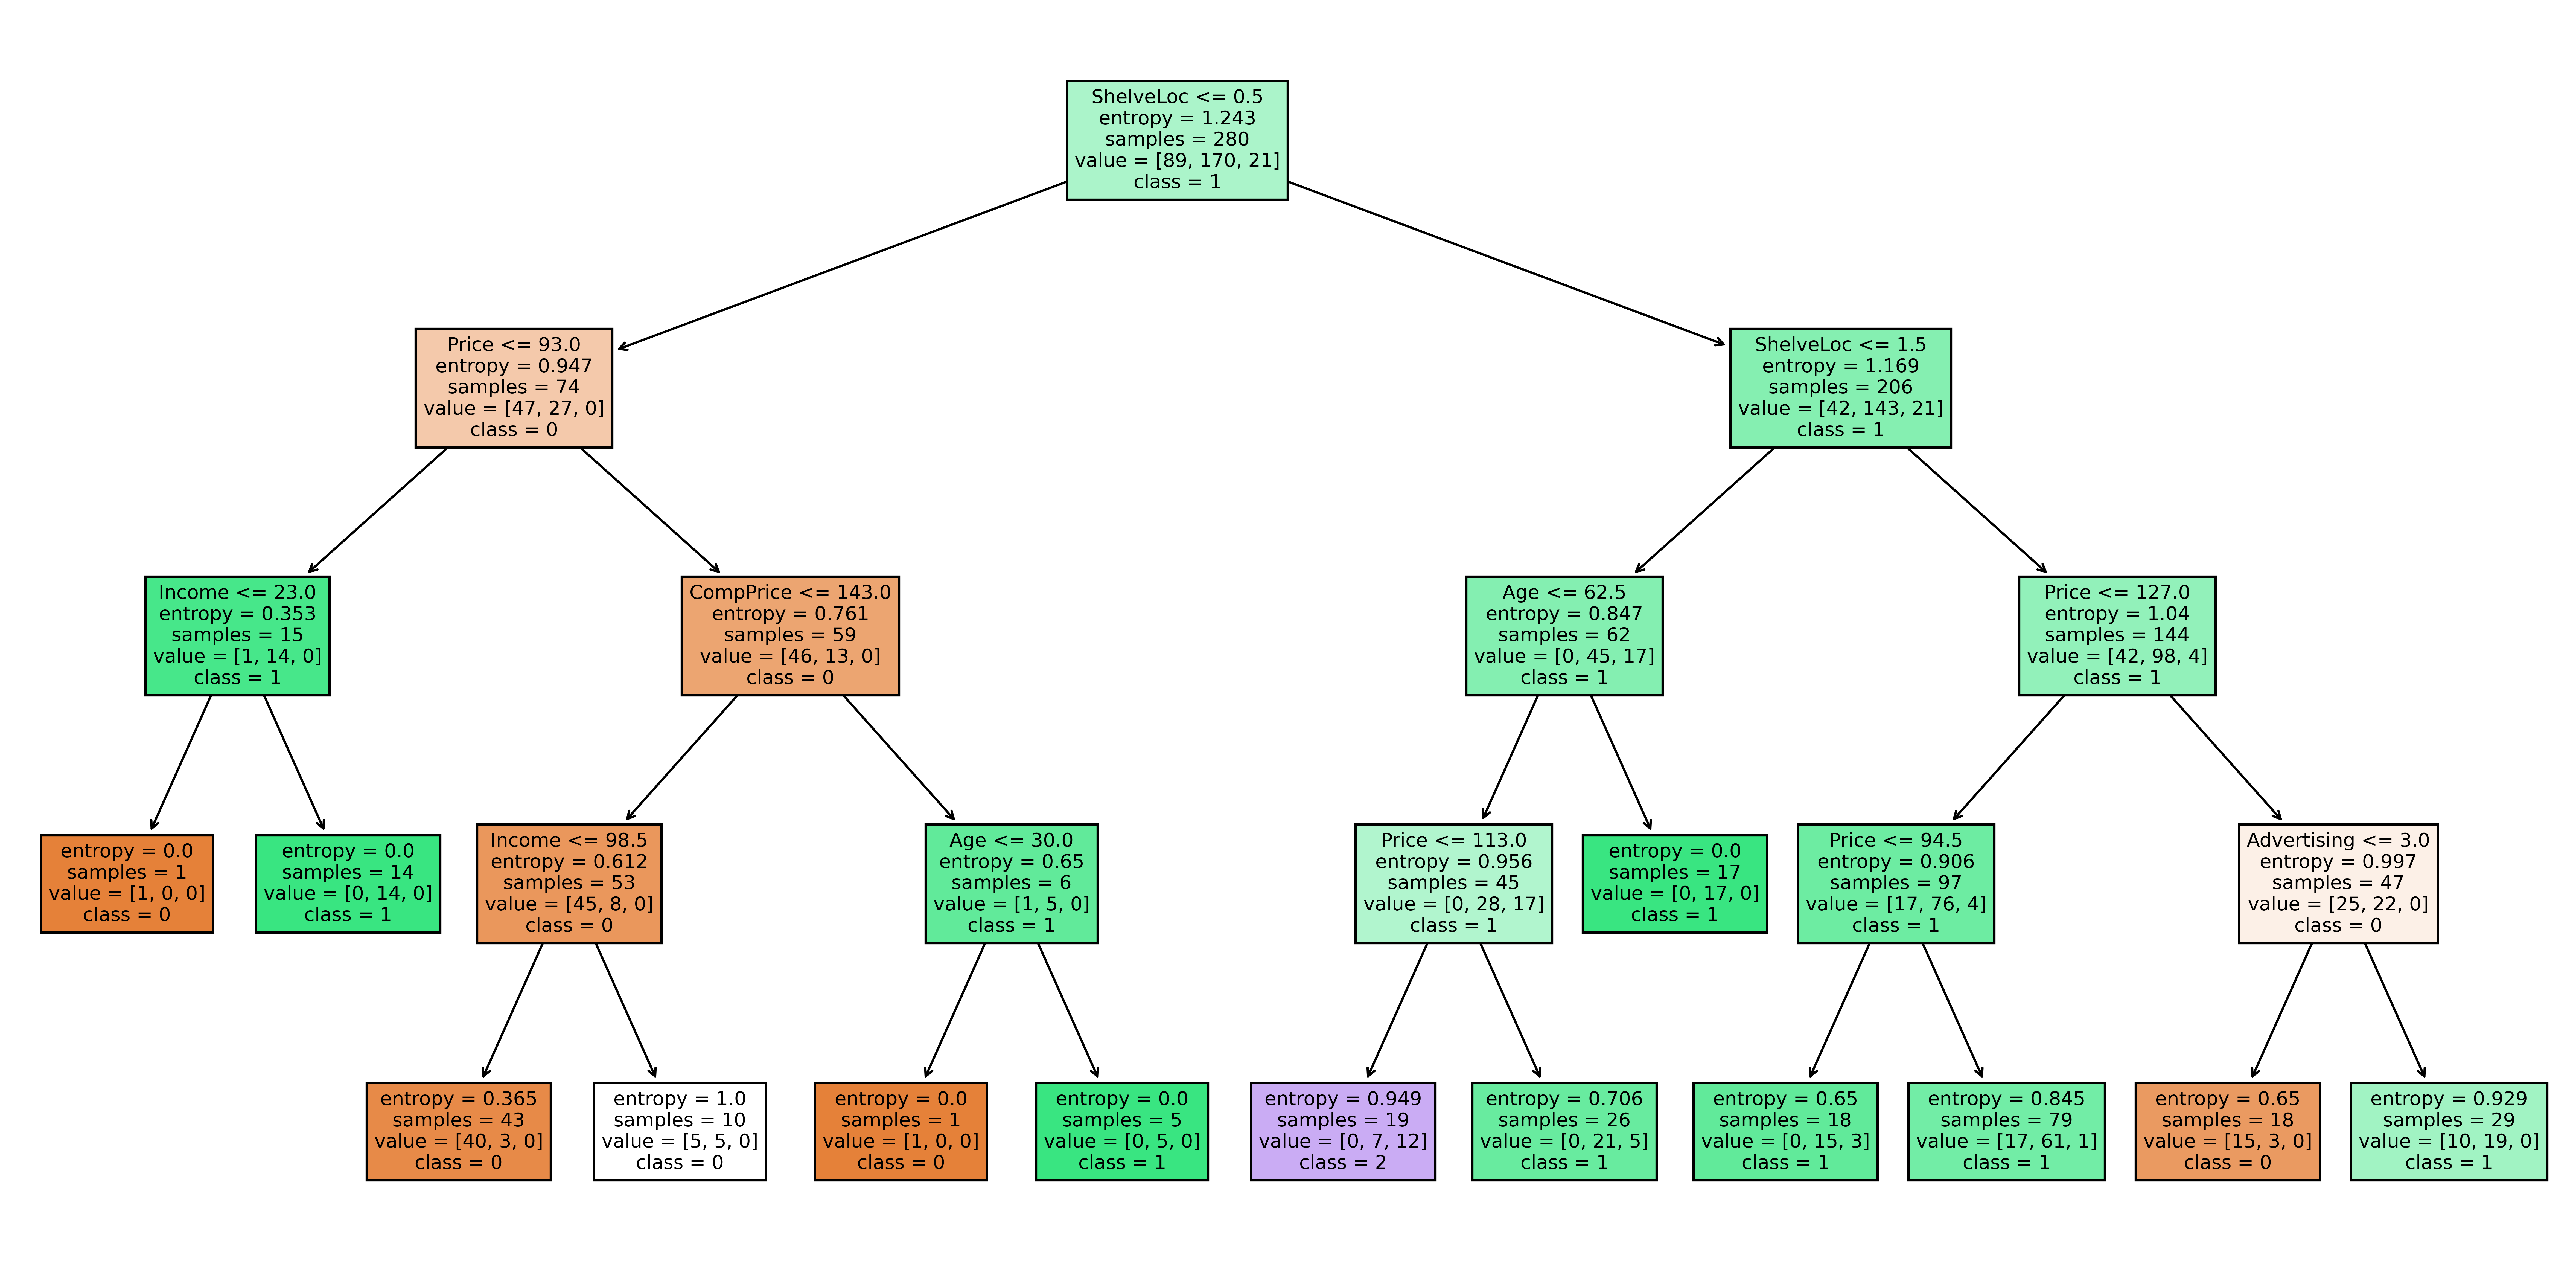

In [93]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US',]
cn=['0','1','2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [53]:
#Predicting on test data
y_pred = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    306
2     61
0     33
dtype: int64

In [64]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[20, 21,  0],
       [ 6, 63,  4],
       [ 0,  3,  3]], dtype=int64)

In [65]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60        41
           1       0.72      0.86      0.79        73
           2       0.43      0.50      0.46         6

    accuracy                           0.72       120
   macro avg       0.64      0.62      0.62       120
weighted avg       0.72      0.72      0.71       120



In [67]:
#Changing max_depth to improve model accuracy

In [68]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model1 = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

In [69]:
frame = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})

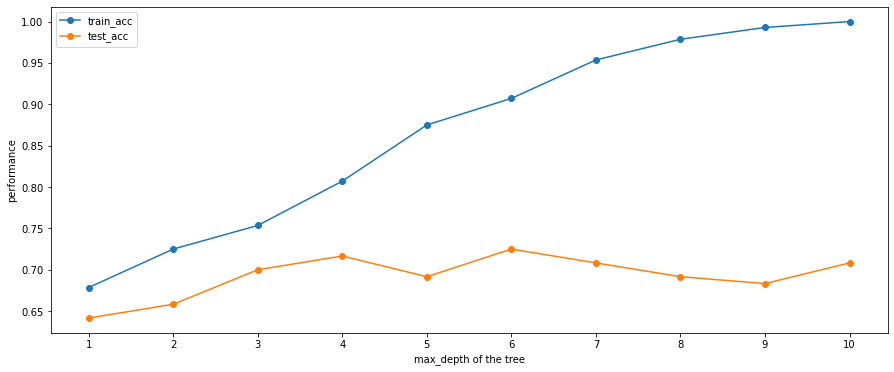

In [70]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [1]:
# let test with max depth 3

model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model2.fit(x_train,y_train)

NameError: name 'DecisionTreeClassifier' is not defined

In [88]:
#Predicting on test data
y_pred2 = model2.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    306
2     61
0     33
dtype: int64

In [89]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred2)

array([[24, 17,  0],
       [13, 60,  0],
       [ 0,  6,  0]], dtype=int64)

In [90]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        41
           1       0.72      0.82      0.77        73
           2       0.00      0.00      0.00         6

    accuracy                           0.70       120
   macro avg       0.46      0.47      0.46       120
weighted avg       0.66      0.70      0.68       120



C:\Users\PawanK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
# Model accuracy is decreasing we will select max depth 4

In [ ]:
# Below combinaiton gives sales above 12000 units

#    --ShelvLoc = Good
#        --Age  <= 62 
#            --Price <= 113